In [1]:
from qiskit import *

In [2]:
%matplotlib inline
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)
circuit.measure(list(range(nqubits)), list(range(nqubits)))

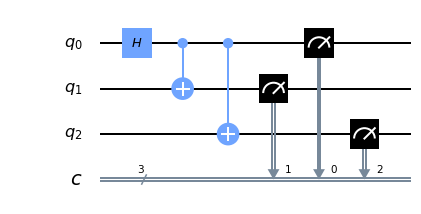

In [3]:
circuit.draw(output='mpl')

In [4]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend=simulator, shots =1024).result()


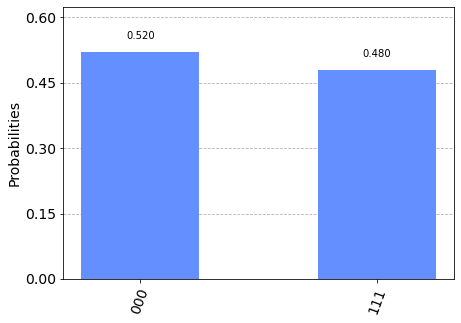

In [5]:
from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts(circuit))

In [6]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmqx2')

In [ ]:
job = execute(circuit,backend=device,shots=1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

5e93816b37df1f0011dda74f
Job Status: job is queued (3)     

In [ ]:
device_results = job.result()
plot_histogram(device_result.get_counts(circuit))

In [ ]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [ ]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel='measerrormitigationcal')
cal_circuits[2].draw(output='mpl')
